In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

In [2]:
data = pd.read_excel('owid-co2-data.xlsx')
columns = ['country', 'iso_code', 'year', 'population', 'gdp', 'co2', 'co2_per_capita', 'co2_growth_prct', 'co2_including_luc_per_capita', 'co2_per_gdp', 'energy_per_gdp']
data = data[columns]

In [3]:
regions = pd.read_excel('world-regions-according-to-the-world-bank.xlsx')

In [4]:
regions.columns = ['country', 'iso_code', 'year', 'region']

In [5]:
regions = regions.drop(index=0).reset_index(drop=True)

In [6]:
regions = regions.drop('year', axis=1)

In [7]:
regions = regions.drop('country', axis=1)

In [8]:
data = pd.merge(data, regions, on='iso_code', how='left')

In [9]:
data['gdp_per_capita'] = data['gdp'] / data['population']

In [10]:
data = data[data['year'].between(2010, 2022)]

In [11]:
data = data.dropna(subset=['co2_per_capita', 'gdp_per_capita', 'region'])

Pearson Correlation: 0.797, p-value: 0.0000
Spearman Correlation: 0.910, p-value: 0.0000


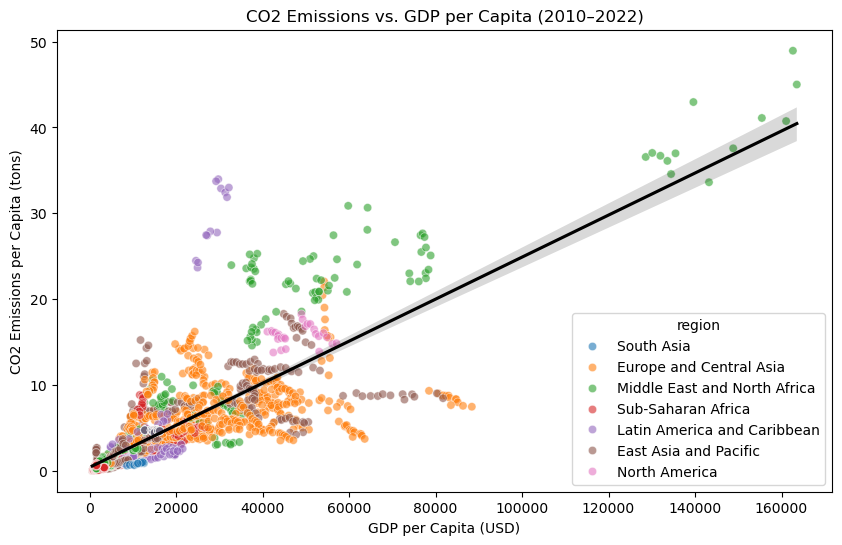

In [12]:
pearson_corr, pearson_p = pearsonr(data['gdp_per_capita'], data['co2_per_capita'])
spearman_corr, spearman_p = spearmanr(data['gdp_per_capita'], data['co2_per_capita'])
print(f"Pearson Correlation: {pearson_corr:.3f}, p-value: {pearson_p:.4f}")
print(f"Spearman Correlation: {spearman_corr:.3f}, p-value: {spearman_p:.4f}")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='gdp_per_capita', y='co2_per_capita', hue='region', alpha=0.6)
sns.regplot(data=data, x='gdp_per_capita', y='co2_per_capita', scatter=False, color='black')
plt.title('CO2 Emissions vs. GDP per Capita (2010–2022)')
plt.xlabel('GDP per Capita (USD)')
plt.ylabel('CO2 Emissions per Capita (tons)')
plt.savefig('rq1_scatter_co2_gdp.png')
plt.show()

ANOVA: F = 145.44, p-value = 0.0000
Kruskal-Wallis: H = 1137.90, p-value = 0.0000


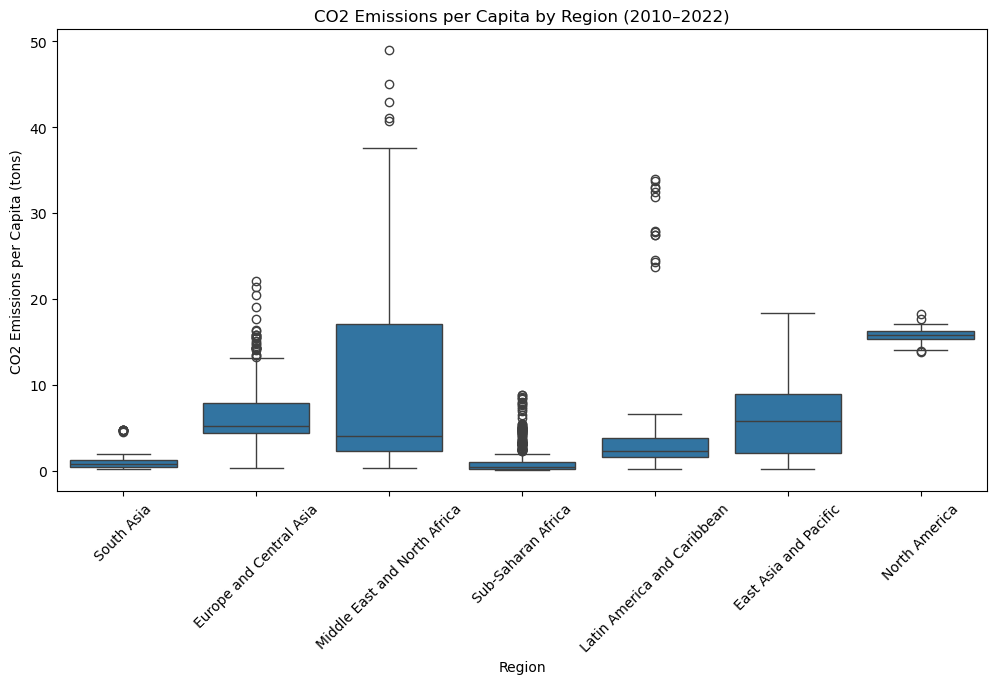

In [13]:
from scipy.stats import f_oneway, kruskal

regions = data['region'].unique()
co2_by_region = [data[data['region'] == r]['co2_per_capita'] for r in regions]

anova_stat, anova_p = f_oneway(*co2_by_region)
print(f"ANOVA: F = {anova_stat:.2f}, p-value = {anova_p:.4f}")

kruskal_stat, kruskal_p = kruskal(*co2_by_region)
print(f"Kruskal-Wallis: H = {kruskal_stat:.2f}, p-value = {kruskal_p:.4f}")

plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='region', y='co2_per_capita')
plt.title('CO2 Emissions per Capita by Region (2010–2022)')
plt.xlabel('Region')
plt.ylabel('CO2 Emissions per Capita (tons)')
plt.xticks(rotation=45)
plt.savefig('rq2_boxplot_co2_region.png')
plt.show()

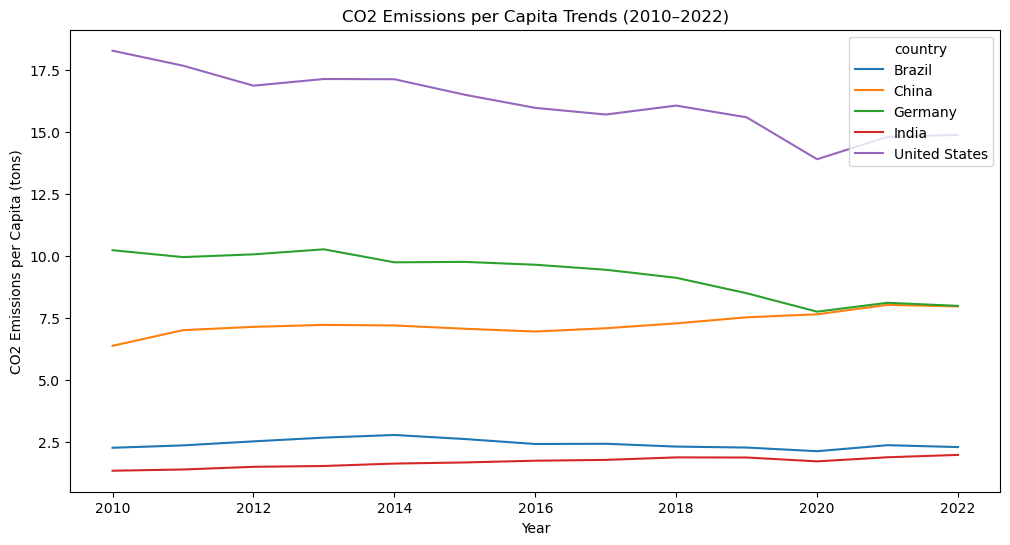

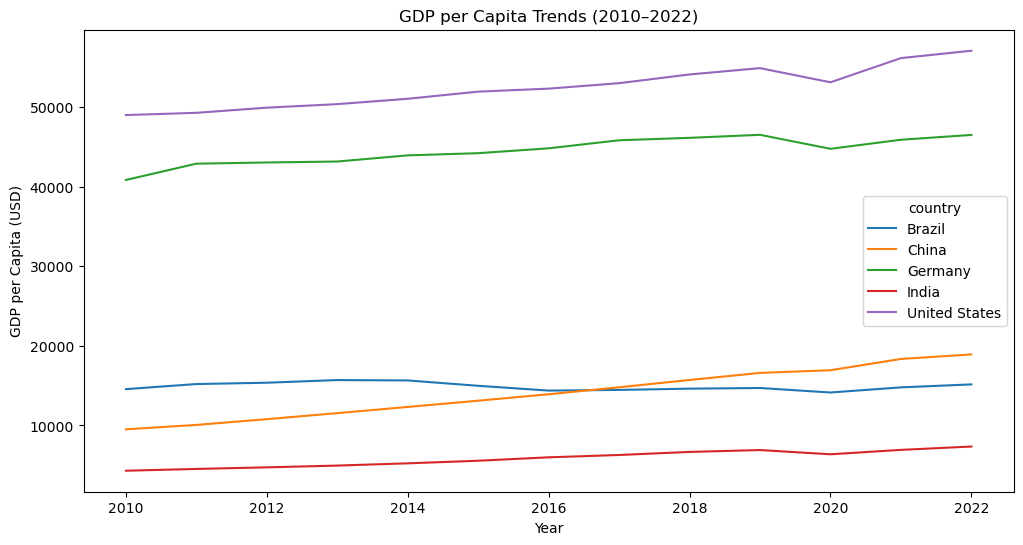

Average Annual Growth Rates (2010–2022):
         country  co2_growth_prct  gdp_growth_prct
0         Brazil         1.884154         0.376937
1          China         2.894692         5.909831
2        Germany        -1.165692         1.105267
3          India         4.515692         4.624083
4  United States        -0.498077         1.298118


In [14]:
countries = ['China', 'United States', 'India', 'Germany', 'Brazil']
trend_data = data[data['country'].isin(countries)]

trend_data = trend_data.sort_values(['country', 'year'])
trend_data['gdp_growth_prct'] = trend_data.groupby('country')['gdp_per_capita'].pct_change() * 100

plt.figure(figsize=(12, 6))
sns.lineplot(data=trend_data, x='year', y='co2_per_capita', hue='country')
plt.title('CO2 Emissions per Capita Trends (2010–2022)')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions per Capita (tons)')
plt.savefig('rq3_lineplot_co2.png')
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(data=trend_data, x='year', y='gdp_per_capita', hue='country')
plt.title('GDP per Capita Trends (2010–2022)')
plt.xlabel('Year')
plt.ylabel('GDP per Capita (USD)')
plt.savefig('rq3_lineplot_gdp.png')
plt.show()

decoupling = trend_data.groupby('country').agg({
    'co2_growth_prct': 'mean',
    'gdp_growth_prct': 'mean'
}).reset_index()
print("Average Annual Growth Rates (2010–2022):")
print(decoupling)